# Stock Price Prediction Using LSTM

## Introduction

Welcome to the Stock Price Prediction project! The aim of this project is to predict the future stock prices of a selected company, JPMorgan Chase & Co. (JPM), using Long Short-Term Memory (LSTM) networks. LSTM networks are a type of recurrent neural network (RNN) that are particularly effective at learning from sequences of data, making them well-suited for time series prediction tasks.

## Project Aim

The primary aim of this project is to develop a machine learning model that can accurately predict future stock prices based on historical stock price data. By leveraging the capabilities of LSTM networks, The aim is to capture the temporal dependencies and trends in the stock price data to make reliable predictions.

## Project Goals

1. **Data Collection and Exploration**: Gather historical stock price data of JPMorgan Chase & Co. from yfinance and perform exploratory data analysis (EDA) to understand the data's characteristics and patterns.
   
2. **Data Preparation**: Preprocess the data to make it suitable for training the LSTM model. This includes scaling the data, creating sequences of stock prices, and splitting the data into training and testing sets.
   
3. **Model Building**: Design and train an LSTM model using the prepared data. Fine-tune the model's hyperparameters to achieve optimal performance.
   
4. **Model Evaluation**: Evaluate the trained model's performance on the testing data using appropriate metrics. Visualize the actual vs. predicted stock prices to assess the model's accuracy.
   
5. **Results and Conclusions**: Analyze the results, discuss the model's performance, and draw conclusions on its effectiveness in predicting stock prices.

Let's get started!


### Importing the necessary packages

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

### Exploratory Data Analysis (EDA)

#### 1. Load and inspect the data

In [2]:
# Load the data
df = pd.read_csv('JPM.csv')

In [3]:
# Display the first few rows of the dataframe
print(df.head())

         Date       Open       High        Low      Close  Adj Close    Volume
0  2010-01-04  41.790001  42.990002  41.669998  42.849998  29.335228  35460500
1  2010-01-05  42.790001  43.840000  42.779999  43.680000  29.903450  41208300
2  2010-01-06  43.450001  44.090000  43.310001  43.919998  30.067751  27729000
3  2010-01-07  43.790001  45.119999  43.610001  44.790001  30.663355  44864700
4  2010-01-08  44.369999  44.700001  44.080002  44.680000  30.588068  33110100


In [4]:
# Basic data information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3663 non-null   object 
 1   Open       3663 non-null   float64
 2   High       3663 non-null   float64
 3   Low        3663 non-null   float64
 4   Close      3663 non-null   float64
 5   Adj Close  3663 non-null   float64
 6   Volume     3663 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 200.4+ KB
None


In [5]:
df.shape

(3663, 7)

#### 2. Summary statistics

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3663.000000,3663.000000,3663.000000,3663.000000,3663.000000,3.663000e+03
mean,90.347849,91.202034,89.504131,90.369244,78.078429,1.958839e+07
std,43.821354,44.199957,43.486658,43.857284,45.651738,1.371112e+07
min,28.250000,29.129999,27.850000,28.379999,19.925253,3.220500e+06
25%,53.265001,53.769998,52.760000,53.274999,39.217135,1.110715e+07
50%,86.930000,87.480003,86.269997,87.019997,71.007614,1.503990e+07
75%,119.974998,121.309998,118.810001,119.805000,110.039395,2.357900e+07
max,215.630005,217.559998,213.270004,216.869995,216.869995,2.172942e+08


#### 3. Visualize the data
Visualising the data to understand the stock price trends

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


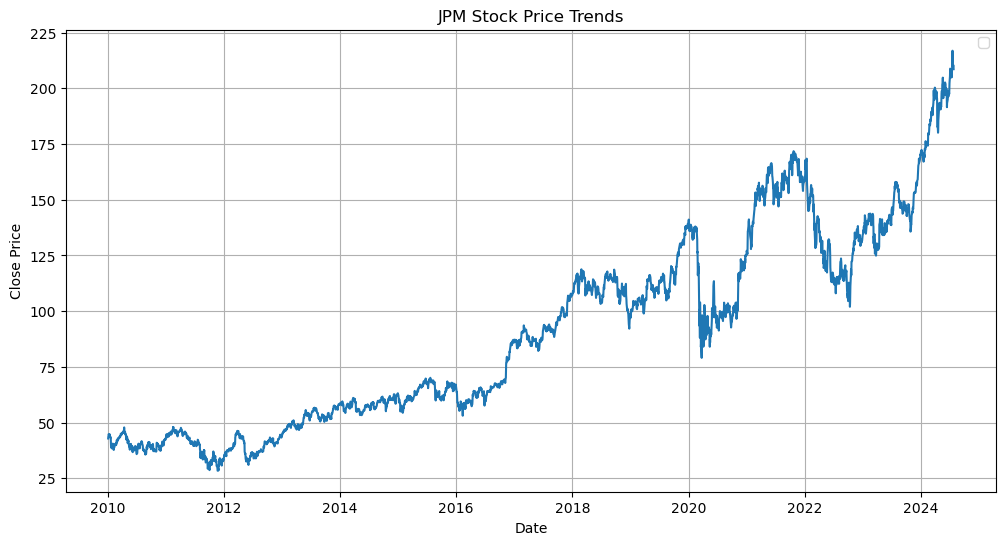

Stock price trends plotted.


In [7]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set Date column as index
df.set_index('Date', inplace=True)

# Stock price trends
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'])
plt.title('JPM Stock Price Trends')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

print("Stock price trends plotted.")

### Observations from the plot:

- The stock price shows an overall upward trend from 2010 to the present.
- There are several noticeable dips and peaks throughout the time series.
- The most significant drop appears to be around early 2020, which likely corresponds to the COVID-19 pandemic's impact on the stock market.
- After the 2020 drop, there's a sharp recovery and continued growth.

#### 4. Check for missing values

In [8]:
print(df.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


#### 5. Visualizing trends and patterns
Visualizing the moving averages and volume of trades to better understand the trends and patterns

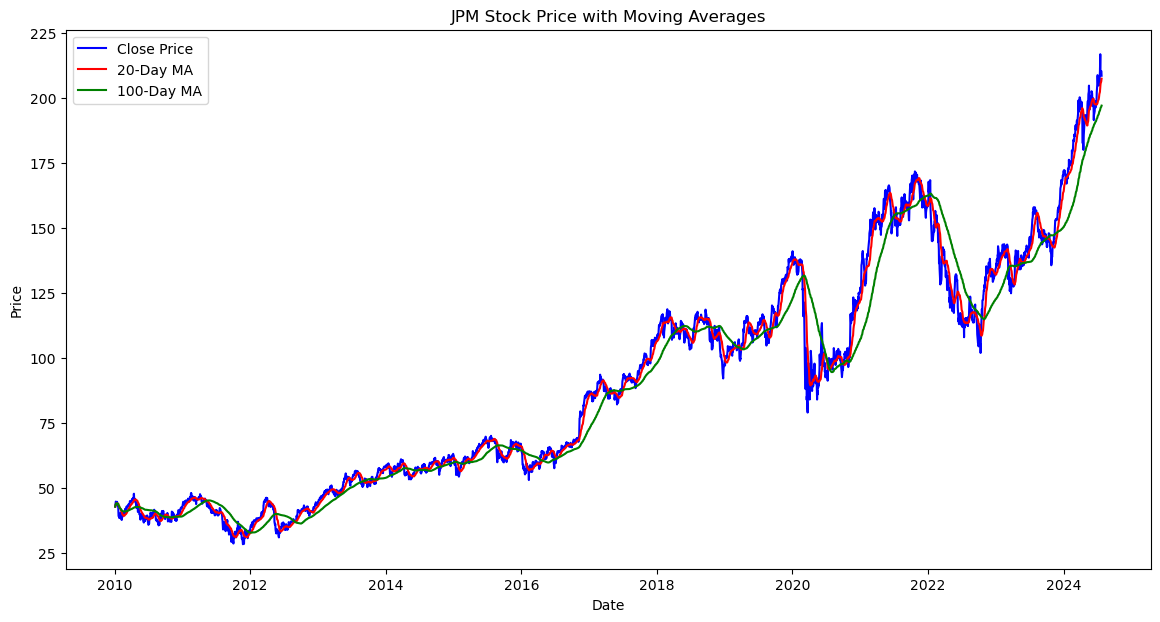

In [9]:
# Calculate moving averages
short_window = 20  # Short-term moving average
long_window = 100  # Long-term moving average

df['Short_MA'] = df['Close'].rolling(window=short_window, min_periods=1).mean()
df['Long_MA'] = df['Close'].rolling(window=long_window, min_periods=1).mean()

# Plot the closing price, short-term MA, and long-term MA
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['Short_MA'], label='20-Day MA', color='red')
plt.plot(df.index, df['Long_MA'], label='100-Day MA', color='green')
plt.title('JPM Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Moving Averages:

- The blue line represents the closing price.
- The red line is the 20-day moving average (short-term).
- The green line is the 100-day moving average (long-term).

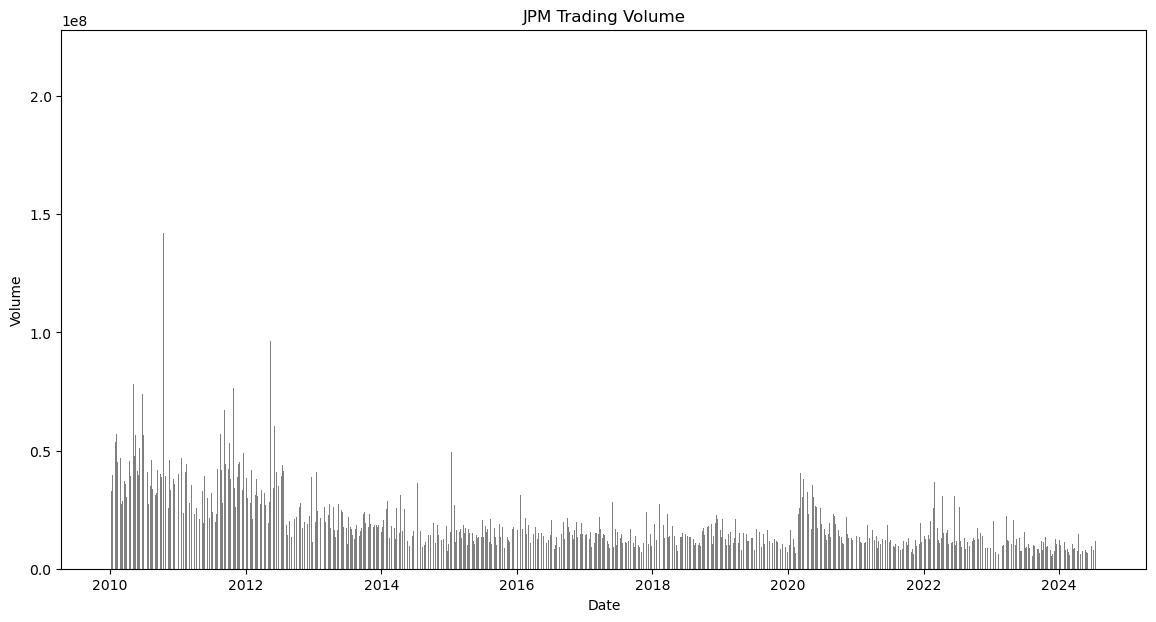

Moving averages and trading volume plots are displayed above.


In [10]:
# Plot the volume of trades
plt.figure(figsize=(14, 7))
plt.bar(df.index, df['Volume'], color='gray')
plt.title('JPM Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

print("Moving averages and trading volume plots are displayed above.")

#### 6. Correlations Between Features
Understanding the correlations between different features can provide insights into their relationships.

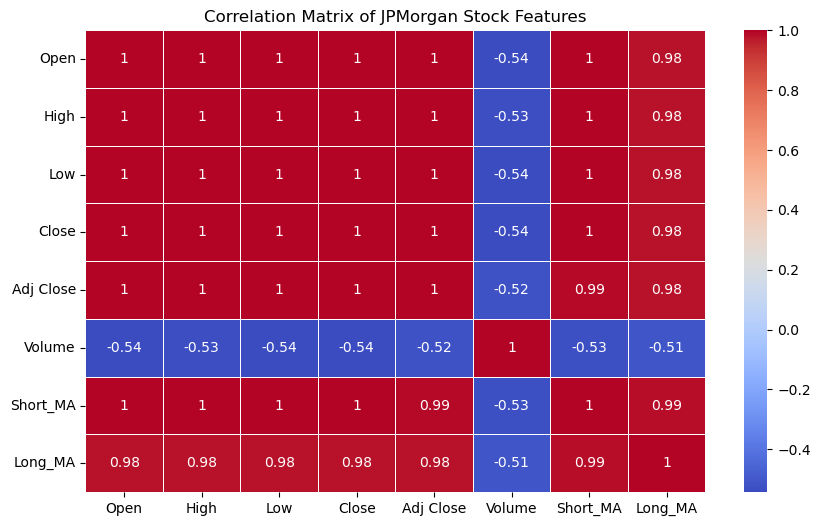

In [11]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of JPMorgan Stock Features')
plt.show()

Correlation: The correlation heatmap shows that the Close, Adj Close, High, Low, and Open prices are highly correlated with each other, which is expected. The Volume has a relatively lower correlation with these prices.

### Summary Statistics:

- The Close price has a mean of around 90.37 dollars with a standard deviation of 43.86 dollars.
- The dataset has a range of prices from a minimum of approximately 28.38 dollars to a maximum of 216.87 dollars.
- The trading volume varies significantly, with a mean of about 19.59 million shares traded per day and a maximum of 217.29 million shares.

# Data Preparation

## Selecting the Relevant 'Close' feature for Feature Scaling
The 'Close' price is typically used for stock prediction for several reasons with the major reason being that the closing price is considered the most significant because it reflects the final price at which a stock traded during a trading day. This price is often seen as a consensus value, representing the collective judgment of all market participants after a full day of trading. Unlike intraday prices (such as 'Open', 'High', or 'Low'), the closing price is less affected by intraday volatility. It represents the settled value of the stock after all the daily trading activity, providing a more stable indicator for analysis.

In [12]:
data = df['Close'].values
data = data.reshape(-1, 1)  # Reshape data to be a 2D array

#### Rationale:

The Close price is extracted from the DataFrame and reshaped into a 2D array. This reshaping is necessary because many machine learning algorithms, including scalers, expect the input data to be in a 2D format.

## Normalizing the data
LSTMs work better with normalized data. MinMaxScaler scales the data between 0 and 1:

In [13]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Initializing the scaler for the 'Close' column
scaler_close = MinMaxScaler(feature_range=(0, 1))
scaled_data_close = scaler_close.fit_transform(data)
scaled_df_close = pd.DataFrame(scaled_data_close, columns=['Close'])
scaled_df_close.index = df.index
print(scaled_df_close)

# Save the normalized data to a new CSV file
scaled_df_close.to_csv('JPM_normalized_close.csv', index=False)
print('Data normalized and saved to JPM_normalized_close.csv')

               Close
Date                
2010-01-04  0.076768
2010-01-05  0.081171
2010-01-06  0.082445
2010-01-07  0.087060
2010-01-08  0.086477
...              ...
2024-07-18  0.963446
2024-07-19  0.962385
2024-07-22  0.965038
2024-07-23  0.965303
2024-07-24  0.956072

[3663 rows x 1 columns]
Data normalized and saved to JPM_normalized_close.csv


#### Rationale:

MinMaxScaler is initialized and applied to scale the 'Close' data. The scaled data is then stored in a new DataFrame, and the index is set to match the original DataFrame's index (i.e., dates). Finally, the normalized data is saved as a CSV file for future use or reference.

## Split Data into Training, Validation, and Test Sets

In [14]:
from sklearn.model_selection import train_test_split

# Ensure data is in NumPy array format
scaled_df_close = scaled_df_close.values

# First split: Train (70%) and Temp (30%)
X_train, X_temp = train_test_split(scaled_df_close, test_size=0.3, shuffle=False, random_state=42)

# Second split: Temp split into Validation (50% of temp) and Test (50% of temp)
X_val, X_test = train_test_split(X_temp, test_size=0.5, shuffle=False, random_state=42)

# Check the shapes of the splits
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_val: {X_val.shape}')
print(f'Shape of X_test: {X_test.shape}')

Shape of X_train: (2564, 1)
Shape of X_val: (549, 1)
Shape of X_test: (550, 1)


#### Rationale:

The train_test_split function is used twice: first to split the data into training and temporary sets (70% training, 30% temporary), and then to split the temporary set into validation and test sets (each 50% of the temporary set). This approach ensures a clear division of data for training, validation, and testing.


## Create Sequences for LSTM Input
Create sequences from the split data, suitable for input to the LSTM model.

In [15]:
# Create sequences for LSTM
def create_dataset(dataset, time_step=1):
    X = []
    y = []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 6  # The number of previous days' data to use for prediction

# Create datasets for LSTM
X_train, y_train_orig = create_dataset(X_train, time_step)
X_val, y_val_orig = create_dataset(X_val, time_step)
X_test, y_test_orig = create_dataset(X_test, time_step)

# Reshape the input data to be 3D for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#### Rationale:

The **create_dataset** function generates sequences and corresponding labels (targets) from the input data. The time_step parameter defines the number of past data points to consider. After creating the sequences, the data is reshaped to 3D format, which is required for LSTM input **(samples, time steps, features)**.

## Build the LSTM Model
Construct the LSTM model with Dropout layers to prevent overfitting. Compile the model with the Adam optimizer and the mean squared error loss function, which is common for regression tasks.

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Build the LSTM Model
def create_model(units=50, dropout_rate=0.1, learning_rate=0.02):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

#### Rationale:

The LSTM model is built with two LSTM layers, each followed by a Dropout layer to reduce the chance of overfitting. The final Dense layer is used to output the prediction. The model is compiled using the Adam optimizer, which adapts the learning rate based on the training data, making it effective for this type of task.

## Train the LSTM Model
Trained the model using the training data, apply EarlyStopping to halt training once the validation loss stops improving. This helps in preventing overfitting and ensures the model generalizes well.

In [17]:
# Implement EarlyStopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the Model
model1 = create_model(units=50, dropout_rate=0.1, learning_rate=0.01)
history = model1.fit(X_train, y_train_orig, epochs=30, batch_size=32, validation_data=(X_val, y_val_orig), callbacks=[early_stop])

# Display the model architecture
model1.summary()

Epoch 1/30


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0079 - val_loss: 4.6211e-04
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.5548e-04 - val_loss: 5.5270e-04
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.9237e-04 - val_loss: 5.4515e-04
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.5132e-04 - val_loss: 0.0015
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.8423e-04 - val_loss: 4.5491e-04
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.7894e-04 - val_loss: 0.0011
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.0731e-04 - val_loss: 4.6593e-04
Epoch 8/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.5307e-04 - val_loss: 3.8798e-04
Epoch 9/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.2951e-04 - val_loss: 5.3517e-04
Epoch 10/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.1199e-04 - val_loss: 7.1247e-04
Epoch 11/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.1662e-04 - val_loss: 0.0012
Epoch 12/

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 6, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

#### Rationale:

Train the model for 30 epochs with a batch size of 32, using the validation data to monitor performance. Configure EarlyStopping to stop training if the validation loss doesn't improve for 10 consecutive epochs, restoring the best weights. The model summary displays the architecture and the number of parameters.

## Evaluate Model Performance and Make Predictions
After training, evaluate the model's performance by making predictions on the training, validation, and test sets. inverse transform the predicted values to their original scale, and calculate the RMSE to assess the model's accuracy.

In [18]:
# Make predictions
train_predict = model1.predict(X_train)
val_predict = model1.predict(X_val)
test_predict = model1.predict(X_test)

# Inverse transform to get actual prices
train_predict = scaler_close.inverse_transform(train_predict)
val_predict = scaler_close.inverse_transform(val_predict)
test_predict = scaler_close.inverse_transform(test_predict)

# Evaluate the model performance
train_score = np.sqrt(np.mean((y_train_orig - train_predict[:, 0])**2))
val_score = np.sqrt(np.mean((y_val_orig - val_predict[:, 0])**2))
test_score = np.sqrt(np.mean((y_test_orig - test_predict[:, 0])**2))

print(f'Train RMSE: {train_score}')
print(f'Validation RMSE: {val_score}')
print(f'Test RMSE: {test_score}')

80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Train RMSE: 75.46150179888251
Validation RMSE: 135.44018751053846
Test RMSE: 150.1084913959563


#### Rationale:

The trained model is used to make predictions on all data splits (train, validation, and test). The predictions are then inverse transformed to revert them to the original scale, enabling a meaningful comparison with the actual prices. The RMSE (Root Mean Squared Error) is computed to quantify the model's prediction accuracy.

## Plot the Model's price predictions against the actual prices of the stock
Plot the model's predicted closing prices for the training, validation and testing sets to visualize how well the model perfoms in predicting the prices as compared to the actual prices

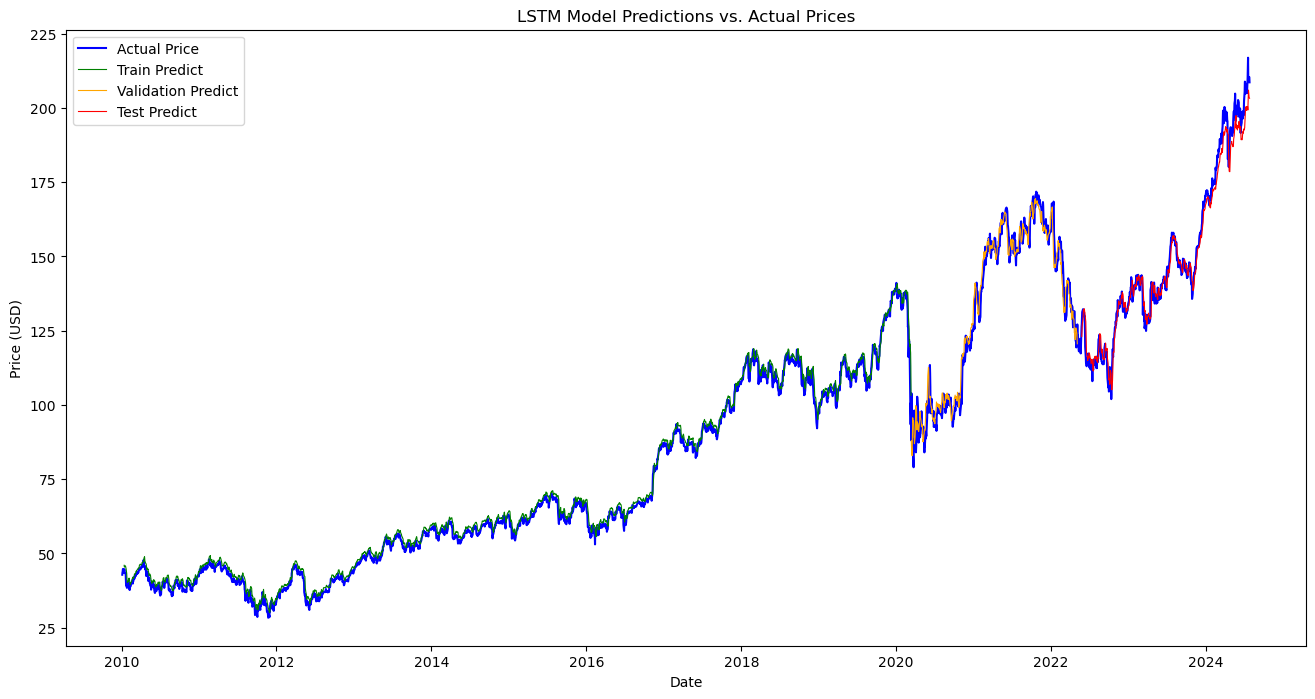

In [19]:
# Ensure data consistency
test_dates = df.index[-len(test_predict):]

plt.figure(figsize=(16, 8))
plt.plot(df.index, data, label='Actual Price', color='blue')
plt.plot(df.index[time_step+1:len(train_predict)+time_step+1], train_predict, label='Train Predict', color='green', linewidth=0.8)
plt.plot(df.index[len(train_predict)+time_step+1:len(train_predict)+len(val_predict)+time_step+1], val_predict, label='Validation Predict', color='orange', linewidth=0.8)
plt.plot(test_dates, test_predict, label='Test Predict', color='red', linewidth=0.8)
plt.title('LSTM Model Predictions vs. Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

# Image file of model prediction and actual price
plt.savefig('LSTM_Model_Predictions_vs_Actual_Prices.png', dpi=300, bbox_inches='tight')

plt.show()

## Explanation of Code and Visualization
This code snippet plots the predictions of an LSTM model against the actual stock prices over time. The chart visualizes three different prediction phases:

- **Train Predict:** Predictions made during the training phase of the model (in green).
- **Validation Predict:** Predictions made during the validation phase (in orange).
- **Test Predict:** Predictions made during the testing phase, which simulate real-world application (in red).
- **Actual Price:** The true observed prices of the stock (in blue).

The plot aims to assess the model's performance by comparing predicted prices with actual prices.

## Insights from the Visualization
From the visualization:

1. **Model Accuracy:** The LSTM model's predictions closely follow the actual prices, suggesting that the model has learned the stock price patterns well.

2. **Train Predict:** The training predictions (green line) overlay well with the actual prices, indicating the model performed well on the training data.

3. **Validation Predict:** The validation predictions (orange line) are also in close proximity to the actual prices, showing that the model maintained its accuracy on unseen validation data.

4. **Test Predict:** The test predictions (red line) continue to align with the actual prices, though there are some areas of slight divergence, especially in the more volatile periods. This could indicate the model's robustness in generalizing to new data.

## Summary
- The LSTM model has demonstrated strong predictive performance across the training, validation, and testing datasets, as evidenced by the close alignment of the predicted prices with the actual stock prices. The model appears to capture the underlying trends in the stock prices effectively.

- However, there are minor discrepancies in the test predictions, which could be attributed to market volatility or model limitations. Future work could focus on further tuning the model parameters or exploring different model architectures to reduce these discrepancies.

- Overall, this analysis confirms the model's potential utility in forecasting stock prices, which could be valuable for decision-making in finance.